In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

piazza_data = pd.read_csv("./labData.csv")

In [3]:
piazza_data

,days online,views,contributions,questions,answers,Grade
0,6,24,1,0,1,84.450059
1,68,136,30,0,17,94.660635
2,54,122,2,0,0,80.707490
3,0,0,0,0,0,79.756286
4,41,123,1,1,0,87.501975
5,46,91,12,7,0,94.526755
6,29,87,11,2,5,83.817988
7,32,123,17,11,1,90.846254
8,98,127,50,10,18,98.671115
9,6,31,1,1,0,87.508948


In [4]:
x = piazza_data[["contributions"]].values
y = piazza_data[["Grade"]].values

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=1693)


In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

<function matplotlib.pyplot.show>

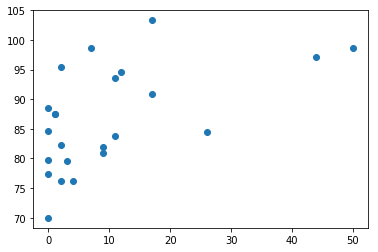

In [10]:
plt.scatter(x_train, y_train)
plt.show

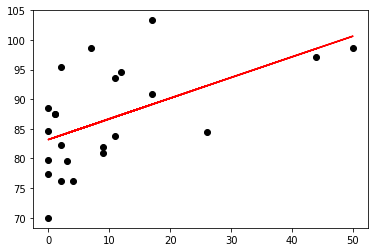

In [12]:
plt.scatter(x_train, y_train, color="black")
plt.plot(x_train, regression.predict(x_train), color="red")
plt.show()

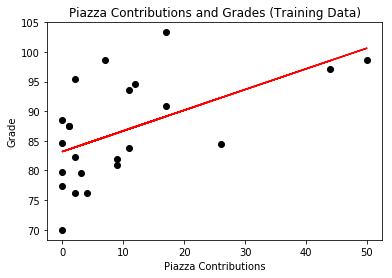

In [14]:
plt.scatter(x_train, y_train, color="black")
plt.plot(x_train, regression.predict(x_train), color="red")
plt.title("Piazza Contributions and Grades (Training Data)")
plt.xlabel("Piazza Contributions")
plt.ylabel("Grade")
plt.show()

In [15]:
y_predictions = regression.predict(x_test)


In [17]:
[y_test, y_predictions]

[array([[85.3619999 ],
        [65.80813036],
        [79.87962424],
        [86.59306021],
        [90.08245761],
        [84.45005886],
        [94.66063545],
        [80.70749047]]), array([[88.42281244],
        [83.19116839],
        [83.19116839],
        [84.58627347],
        [86.33015482],
        [83.53994466],
        [93.6544565 ],
        [83.88872093]])]

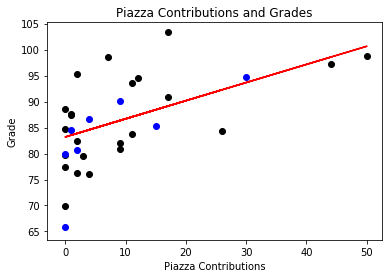

In [18]:
plt.scatter(x_train, y_train, color="black")
plt.scatter(x_test, y_test, color="blue")
plt.plot(x_train, regression.predict(x_train), color="red")
plt.title("Piazza Contributions and Grades")
plt.xlabel("Piazza Contributions")
plt.ylabel("Grade")
plt.show()

In [19]:
x = piazza_data[["contributions", "days online", "views", "questions", "answers"]].values
y = piazza_data[["Grade"]].values

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1693)

In [25]:
from sklearn.preprocessing import StandardScaler

scale_x = StandardScaler()
x_train = scale_x.fit_transform(x_train)
x_test = scale_x.transform(x_test)

x_test

array([[ 0.38260227,  1.44308865,  1.04079641, -0.18904977,  0.52613405],
       [-0.74558391, -1.43172574, -2.07942223, -0.84127146, -0.50374537],
       [-0.74558391, -0.69124325,  0.81614067, -0.84127146, -0.50374537],
       [-0.44473426, -0.12499193, -0.50683204, -0.406457  ,  0.01119434],
       [-0.0686722 ,  1.44308865,  1.14064341, -0.62386423,  0.78360391],
       [-0.6703715 , -1.17037898, -1.48034025, -0.84127146, -0.24627551],
       [ 1.51078846,  1.53020423,  1.31537565, -0.84127146,  3.87324218],
       [-0.59515909,  0.92039512,  0.96591116, -0.84127146, -0.50374537]])

In [26]:
multiple_regression = LinearRegression()
multiple_regression.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
y_predictions = multiple_regression.predict(x_test)

In [28]:
[y_test, y_predictions]

[array([[85.3619999 ],
        [65.80813036],
        [79.87962424],
        [86.59306021],
        [90.08245761],
        [84.45005886],
        [94.66063545],
        [80.70749047]]), array([[92.00457807],
        [76.83085344],
        [83.28645335],
        [85.13809364],
        [92.00125779],
        [78.70692855],
        [91.79514715],
        [88.66683579]])]

In [29]:
from sklearn.preprocessing import PolynomialFeatures

In [44]:
xpoly = piazza_data[["contributions", "days online", "views", "questions", "answers"]].values
ypoly = piazza_data[["Grade"]].values

In [45]:
poly_data = PolynomialFeatures(degree = 2)

x_poly = poly_data.fit_transform(xpoly)

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x_poly, ypoly, test_size = 0.25, random_state = 1693)

array([[1.0000e+00, 1.0000e+00, 6.0000e+00, 2.4000e+01, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 6.0000e+00, 2.4000e+01, 0.0000e+00,
        1.0000e+00, 3.6000e+01, 1.4400e+02, 0.0000e+00, 6.0000e+00,
        5.7600e+02, 0.0000e+00, 2.4000e+01, 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [1.0000e+00, 3.0000e+01, 6.8000e+01, 1.3600e+02, 0.0000e+00,
        1.7000e+01, 9.0000e+02, 2.0400e+03, 4.0800e+03, 0.0000e+00,
        5.1000e+02, 4.6240e+03, 9.2480e+03, 0.0000e+00, 1.1560e+03,
        1.8496e+04, 0.0000e+00, 2.3120e+03, 0.0000e+00, 0.0000e+00,
        2.8900e+02],
       [1.0000e+00, 2.0000e+00, 5.4000e+01, 1.2200e+02, 0.0000e+00,
        0.0000e+00, 4.0000e+00, 1.0800e+02, 2.4400e+02, 0.0000e+00,
        0.0000e+00, 2.9160e+03, 6.5880e+03, 0.0000e+00, 0.0000e+00,
        1.4884e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+0

In [47]:
poly_reg = LinearRegression()
poly_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [48]:
y_predictions = poly_reg.predict(x_test)

In [49]:
y_predictions

array([[129.99061299],
       [ 78.49434438],
       [ 79.54514783],
       [100.30428982],
       [ 39.96292796],
       [ 97.39924577],
       [-76.61352846],
       [156.61096896]])

In [39]:
x = piazza_data[["contributions"]].values
y = piazza_data[["Grade"]].values

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=1693)

scale_x = StandardScaler()
x_train = scale_x.fit_transform(x_train)
x_test = scale_x.transform(x_test)

/home/scott/anaconda3/envs/conda_ML/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [41]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

poly_data = PolynomialFeatures(degree =2)
poly_reg = LinearRegression()
poly_reg.fit(poly_data.fit_transform(x_train), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

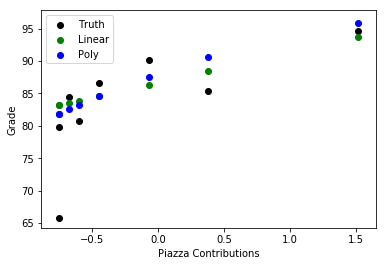

In [43]:
plt.scatter(x_test, y_test, color="black", label = "Truth")
plt.scatter(x_test, lin_reg.predict(x_test), color = "green", label="Linear")
plt.scatter(x_test, poly_reg.predict(poly_data.fit_transform(x_test)), color="blue", label = "Poly")
plt.xlabel("Piazza Contributions")
plt.ylabel("Grade")
plt.legend()
plt.show()